In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = {
    'Weight': [79, 69, 73, 95, 82, 55, 69, 71, 64, 69],
    'Height': [1.80, 1.68, 1.82, 1.70, 1.87, 1.55, 1.50, 1.78, 1.67, 1.64],
    'Age': [35, 39, 25, 60, 27, 18, 89, 42, 16, 52],
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Male',
               'Female', 'Female', 'Female', 'Female', 'Female']
}
df = pd.DataFrame(data)

In [ ]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
gender_encoded = encoder.fit_transform(df[['Gender']])
gender_df = pd.DataFrame(gender_encoded, columns=['Gender_Male'])

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Height', 'Age']])
scaled_df = pd.DataFrame(scaled_features, columns=['Height_scaled', 'Age_scaled'])

In [ ]:
X = pd.concat([scaled_df, gender_df], axis=1)
y = df['Weight']

In [ ]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [ ]:
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("Linear Regression Model trained successfully")
print("R² Score: ",r2)
print("RMSE: ",rmse)

Linear Regression Model trained successfully
R² Score:  0.7535455935615614
RMSE:  5.102493850673087


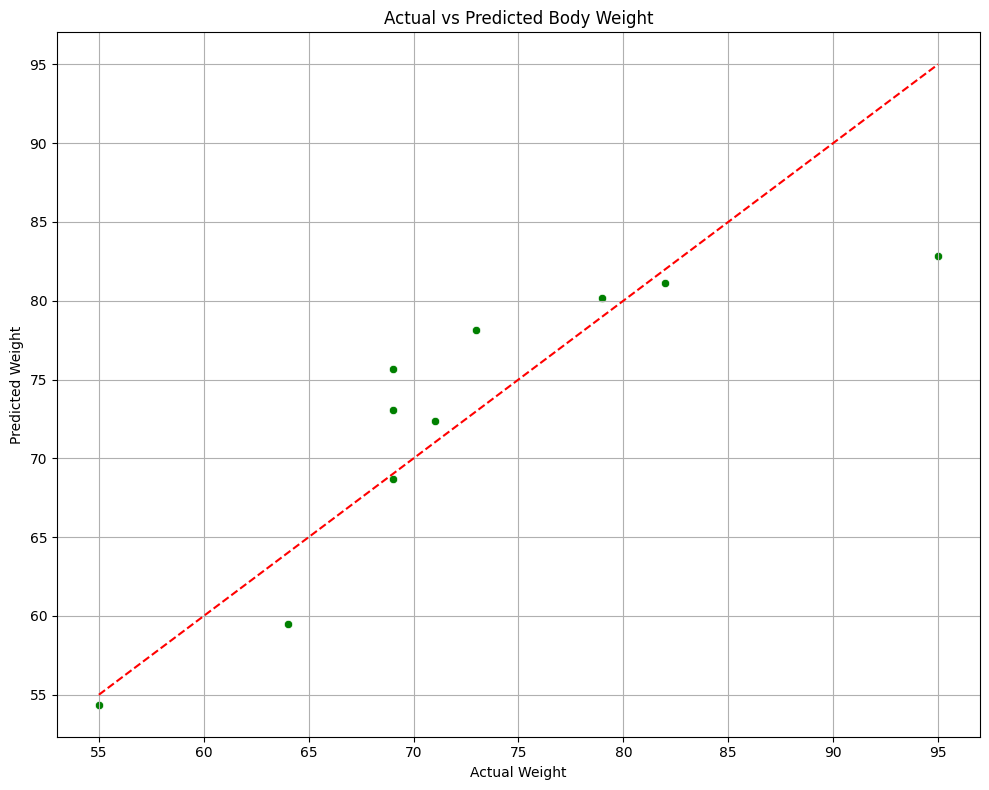

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=y, y=y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Body Weight")
plt.grid(True)
plt.tight_layout()
plt.show()